In [2]:
import pandas as pd
import numpy as np

import pickle

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### csv 파일 살펴보기

In [3]:
train_dir = '../dataset/train/train.csv'
test_dir = '../dataset/test/test_data.csv'

In [4]:
train = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)

In [6]:
train.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [7]:
test.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia
3,3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia
4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree


In [10]:
def explore(data, idx):
    print(data['sentence'][idx])
    print(data['subject_entity'][idx])
    print(data['object_entity'][idx])
    print(data['label'][idx])

In [11]:
explore(train, 0)

〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.
{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}
no_relation


In [13]:
explore(test, 0)

지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.
{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, 'type': 'ORG'}
{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_idx': 21, 'type': 'ORG'}
100


### pickle 파일 불러와 라벨 관찰

In [16]:
# pkl 파일은 이진수로 인코딩되어 있기때문에 'rb' (read-binary)로 읽어야함
with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
    
dict_label_to_num

{'no_relation': 0,
 'org:top_members/employees': 1,
 'org:members': 2,
 'org:product': 3,
 'per:title': 4,
 'org:alternate_names': 5,
 'per:employee_of': 6,
 'org:place_of_headquarters': 7,
 'per:product': 8,
 'org:number_of_employees/members': 9,
 'per:children': 10,
 'per:place_of_residence': 11,
 'per:alternate_names': 12,
 'per:other_family': 13,
 'per:colleagues': 14,
 'per:origin': 15,
 'per:siblings': 16,
 'per:spouse': 17,
 'org:founded': 18,
 'org:political/religious_affiliation': 19,
 'org:member_of': 20,
 'per:parents': 21,
 'org:dissolved': 22,
 'per:schools_attended': 23,
 'per:date_of_death': 24,
 'per:date_of_birth': 25,
 'per:place_of_birth': 26,
 'per:place_of_death': 27,
 'org:founded_by': 28,
 'per:religion': 29}

### 라벨 숫자로 맵핑 & 라벨별 개수 파악

In [18]:
train['label_to_num'] = [dict_label_to_num[l] for l in train.label]

In [19]:
train['label_to_num'].value_counts().sort_index()

0     9534
1     4284
2      420
3      380
4     2103
5     1320
6     3573
7     1195
8      139
9       48
10     304
11     193
12    1001
13     190
14     534
15    1234
16     136
17     795
18     450
19      98
20    1866
21     520
22      66
23      82
24     418
25    1130
26     166
27      40
28     155
29      96
Name: label_to_num, dtype: int64

<AxesSubplot:xlabel='label_to_num', ylabel='count'>

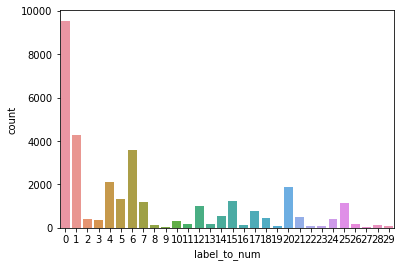

In [20]:
sns.countplot(data=train, x='label_to_num')

### 0번 라벨 제외하고 개수 파악

<AxesSubplot:xlabel='label_to_num', ylabel='count'>

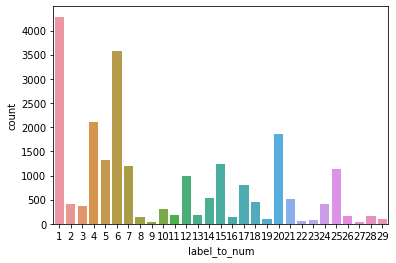

In [22]:
train_valid = train.loc[train.label != 'no_relation']
sns.countplot(data=train_valid, x='label_to_num')

In [23]:
from transformers import AutoTokenizer
from load_data import *

In [24]:
MODEL_NAME = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [28]:
tokenizer.__init__

<bound method BertTokenizerFast.__init__ of PreTrainedTokenizerFast(name_or_path='klue/bert-base', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})>

In [32]:
tokenized_sentences = tokenizer(
      # concat_entity,
      list(train['sentence']),
      return_tensors="pt",
      padding=True,
      truncation=True,
      max_length=256,
      add_special_tokens=True,
      )

In [42]:
type(tokenized_sentences), tokenized_sentences[0]

(transformers.tokenization_utils_base.BatchEncoding,
 Encoding(num_tokens=231, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing]))

In [47]:
# wp_tokenizer = BertWordPieceTokenizer(
#     clean_text=True,    # [이순신, ##은, ' ', 조선]
#     handle_chinese_chars=True,
#     strip_accents=False,    # True: [YepHamza] -> [Yep, Hamza]
#     lowercase=False,
# )
# # And then train
# wp_tokenizer.train(
#     files="my_data/wiki_20190620_small.txt",
#     vocab_size=10000,
#     min_frequency=2,
#     show_progress=True,
#     special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"],
#     limit_alphabet=1000,
#     wordpieces_prefix="##"
# )
# # Save the files
# wp_tokenizer.save_model("wordPieceTokenizer", "my_tokenizer")

def myFunction(texts) : 
    texts_lens = []
    word_list = []
    word_lens_per_sent = []
    
    # 문장의 길이를 저장 및 Wordpiece 단위로 토큰화
    for text in texts : 
        texts_lens.append(len(text))
      
        words = tokenizer(text).tokens
        word_list.extend(words)
        word_lens_per_sent.append(len(words))
    
    # 문장에 포함된 단어들 카운트
    counter = Counter(word_list)
    
    # 가장 많이 나온 단어 10개
    word_list = counter.most_common(n=10)

    # 빈도는 지우고 단어만, 순서대로 저장
    word_list = [word[0] for word in word_list]

    #TODO. 아래와 같은 두 개의 그래프를 그려 출력해봅시다.
    """
    1. X축에는 코퍼스 내 단어들을 출현 빈도 순으로 정렬하고, Y축은 각 단어들의 출현 빈도를 log-scale로 나타내는 그래프
    2. 코퍼스 내의 각 문장들의 단어 개수에 대한 히스토그램
    """
    # 등장 빈도순으로 단어를 정렬하여 시각화
    sorted_words = sorted(counter.items(), key=lambda item: (-item[1], item[0]))
    sorted_frequency_logscale = [np.log10(el[1]) for el in sorted_words]
    indices = np.arange(len(sorted_frequency_logscale))
    plt.plot(indices, sorted_frequency_logscale)
    plt.ylabel('log10(frequency)', fontsize=16)
    plt.show()
    
    # 문장 단어 개수에 대한 히스토그램 시각화
    plt.hist(word_lens_per_sent, bins=20)
    plt.xlabel("# of words")

    return {"texts" : len(texts),
            "num_unique_words":len(counter),
            "maximum" : np.max(texts_lens), "minumum" : np.min(texts_lens),
            "mean" : np.mean(texts_lens), "median" : np.median(texts_lens),
            "word_maximum" : np.max(word_lens_per_sent), "word_minumum" : np.min(word_lens_per_sent),
            "word_mean" : np.mean(word_lens_per_sent), "word_median" : np.median(word_lens_per_sent),
            "TOP10_word":word_list[:10]}

corpus = list(train['sentence'])
myFunction(corpus)

TypeError: 'method' object is not iterable

In [50]:
tokenizer(corpus[0])

{'input_ids': [2, 168, 30985, 14451, 7088, 4586, 169, 793, 8373, 14113, 2234, 2052, 1363, 2088, 29830, 2116, 14879, 2440, 6711, 170, 21406, 26713, 2076, 25145, 5749, 171, 1421, 818, 2073, 4388, 2062, 18, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [51]:
tokenizer

PreTrainedTokenizerFast(name_or_path='klue/bert-base', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})